# Técnicas de Pré-processamento

In [1]:
# Bibliotecas que precisam ser instaladas para a prática:
!pip install nltk==3.8.1
!pip install spacy==3.7.2
!pip install unidecode==1.3.8
!pip install wikipedia==1.4.0
!pip install matplotlib==3.7.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 9.6 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.4
    Uninstalling spacy-3.7.4:
      Successfully uninstalled spacy-3.7.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11680 sha256=792a99b85103850367c35451b6a426e20d45b80e72956f31a8964c05dc0b722d
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [2]:
# Declara define funções utilitárias utilizadas no notebook.
import datetime
import sys

import matplotlib.pyplot as plt
from nltk.probability import FreqDist

def formata_msg(nivel, msg):
    """
    Formata uma mensagem de log incluindo o nível de severidade, timestamp
    e a mensagem.

    Parâmetros:
    - nivel (str): Nível de severidade da mensagem (ex: 'INFO', 'ERROR', 'WARNING').
    - msg (str): A mensagem de log propriamente dita.

    Retorna:
    - str: A mensagem de log formatada.
    """
    timestamp = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')

    return f"[{nivel}] {timestamp} - {msg}"


def calcula_pct_reducao(valor_inicial, valor_final):
  """
  Calcula a porcentagem de redução de um valor inicial para um valor final.

  Args:
      valor_inicial (float): O valor inicial antes da redução.
      valor_final (float): O valor após a redução.

  Returns:
      float: A porcentagem de redução do valor inicial para o valor final.
  """
  return (valor_inicial - valor_final)/valor_inicial * 100


def plot_frequencia_tokens(tokens, ax, title):
    """
    Plota a frequência dos 20 tokens mais comuns em um gráfico de barras horizontais,
    formatado de acordo com os princípios de storytelling.

    Gera um gráfico de barras horizontais no objeto de eixo do Matplotlib fornecido,
    destacando os tokens mais comuns e suas frequências, com foco em clareza e
    comunicação eficaz dos dados.

    Parâmetros:
    - tokens (list): Lista de tokens para análise de frequência.
    - ax (matplotlib.axes.Axes): Eixo onde o gráfico será plotado.
    - title (str, opcional): Título do gráfico.

    Retorna:
    - None

    Exemplo:
    >>> fig, ax = plt.subplots()
    >>> plot_frequencia_tokens(['a', 'b', 'a'], ax)
    """
    fd_words = FreqDist(tokens)
    most_common = fd_words.most_common(20)
    words, frequencies = zip(*most_common)
    y_pos = range(len(words))

    ax.barh(y_pos, frequencies, align='center', color='skyblue')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(words, fontsize=10)
    ax.invert_yaxis()  # Inverte o eixo y para que os valores mais altos fiquem no topo

    for i, v in enumerate(frequencies):
        ax.text(v + 0.1, i, str(v), color='black', va='center', fontsize=8)

    ax.set_xlabel('Frequência', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.grid(axis='x', linestyle='--', alpha=0.6)  # Adiciona uma grade sutil no eixo x

    # Remove as bordas superior e direita para um visual mais limpo
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

print(formata_msg("INFO", "Funções utilitárias prontas para utilização."))
print(formata_msg("INFO", f"Versão do Python: {sys.version} "))

[INFO] 2024-05-05 03:39:20 - Funções utilitárias prontas para utilização.
[INFO] 2024-05-05 03:39:20 - Versão do Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0] 


In [3]:
# Importa módulos essenciais para funcionalidades do notebook.
import re
import string

import nltk
from nltk.corpus import stopwords

import spacy
from unidecode import unidecode
import wikipedia

print(formata_msg("INFO", "Pacotes importadas com sucesso; ambiente pronto."))

[INFO] 2024-05-05 03:41:02 - Pacotes importadas com sucesso; ambiente pronto.


In [4]:
# Baixa as bibliotecas necessárias do NLTK e do Spacy
nltk.download("stopwords")        # Baixa lista de stopwords
nltk.download('punkt')            # Baixa dados para o tokenizador
nltk.download('rslp')             # Baixa o stemmer RSLP para o português
!spacy download pt_core_news_sm   # Baixa o modelo de linguagem pré-treinado fornecido pela biblioteca spaCy

print(formata_msg("INFO", "Download das bases do NLTK e Spacy realizado com sucesso."))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 28.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
[INFO] 2024-05-05 03:41:15 - Download das bases do NLTK e Spacy realizado com sucesso.


## Wikipedia

A Wikipedia é uma enciclopédia digital gratuita e de código aberto que permite aos usuários ler e editar seu conteúdo. Representando a maior e mais popular fonte de referência na internet, destaca-se pelo seu modelo colaborativo, no qual voluntários de todo o mundo contribuem com informações em vários idiomas. Para acessar e interagir com o conteúdo da Wikipedia usando Python, pode-se utilizar o pacote "wikipedia", uma biblioteca Python desenvolvida para simplificar a busca e recuperação de artigos, além de facilitar a obtenção de resumos, links e outras informações disponíveis na Wikipedia.



In [28]:
# Define o idioma da Wikipedia para Português
wikipedia.set_lang("pt")

# Busca a página da Wikipedia sobre Processamento de Linguagem Natural (PLN)
pln = wikipedia.page("gig economy")

# Extrai o conteúdo da página como um corpus de texto
corpus = pln.content

print(formata_msg("INFO",f"1000 caracteres do conteúdo textual da URL {pln.url}:\n"))
print("--- INÍCIO ---")
print(pln.content[0:1000])
print("--- TÉRMINO ---")

[INFO] 2024-05-05 03:45:54 - 1000 caracteres do conteúdo textual da URL https://pt.wikipedia.org/wiki/Freelancer:

--- INÍCIO ---
Freelancer, também conhecido popularmente no Brasil pelas expressões ou gírias freela ou frila, é o termo inglês para denominar o profissional autónomo que se autoemprega em diferentes empresas ou, ainda, guia seus trabalhos por projetos, captando e atendendo seus clientes de forma independente. É uma tendência muito em alta no mercado de tradutores, relações públicas, jornalismo, design, propaganda, Web, tecnologia da informação, música e muitos outros.
A expressão, literalmente traduzida como "lanceiro livre", deriva dos cavaleiros medievais mercenários, que se colocavam a serviço dos nobres que lhes pagassem mais para guerrear. Ela apareceu pela primeira vez no livro "Ivanhoé", de Sir Walter Scott, em 1819, no trecho:
"I offered Richard the service of my Free Lances, and he refused them — I will lead them to Hull, seize on shipping, and embark for Flander

## 1. Tokenização
A tokenização é o processo inicial de pré-processamento de textos, que consiste na divisão do conteúdo em unidades menores, como palavras, termos ou tokens. Essas unidades podem incluir palavras, números e sinais de pontuação, essenciais para a compreensão e análise de textos em linguagem natural. A identificação precisa desses elementos é crucial para o processamento eficaz do texto. Existem diversas técnicas para realizar a tokenização, incluindo:

* Utilização da função split() para separar o texto em tokens baseando-se em espaços ou outros delimitadores.
* Uso de expressões regulares (Regex) para uma tokenização mais detalhada e flexível.
* Emprego da biblioteca Natural Language Toolkit (NLTK), especializada em processamento de linguagem natural, que fornece ferramentas avançadas para tokenização, entre outras funções de processamento de texto.


### 1.1. Método **string.split()** da biblioteca padrão

In [29]:
# Divide o corpus em tokens e armazena na lista
tokens_split = corpus.split()

# Exibe os tokens e o número total de tokens
print(formata_msg("INFO", f"Tokens com o string.split(): \n{tokens_split}\n"))
print(formata_msg("INFO", f"Tamanho dos tokens com o string.split(): {len(tokens_split)}"))

[INFO] 2024-05-05 03:45:56 - Tokens com o string.split(): 
['Freelancer,', 'também', 'conhecido', 'popularmente', 'no', 'Brasil', 'pelas', 'expressões', 'ou', 'gírias', 'freela', 'ou', 'frila,', 'é', 'o', 'termo', 'inglês', 'para', 'denominar', 'o', 'profissional', 'autónomo', 'que', 'se', 'autoemprega', 'em', 'diferentes', 'empresas', 'ou,', 'ainda,', 'guia', 'seus', 'trabalhos', 'por', 'projetos,', 'captando', 'e', 'atendendo', 'seus', 'clientes', 'de', 'forma', 'independente.', 'É', 'uma', 'tendência', 'muito', 'em', 'alta', 'no', 'mercado', 'de', 'tradutores,', 'relações', 'públicas,', 'jornalismo,', 'design,', 'propaganda,', 'Web,', 'tecnologia', 'da', 'informação,', 'música', 'e', 'muitos', 'outros.', 'A', 'expressão,', 'literalmente', 'traduzida', 'como', '"lanceiro', 'livre",', 'deriva', 'dos', 'cavaleiros', 'medievais', 'mercenários,', 'que', 'se', 'colocavam', 'a', 'serviço', 'dos', 'nobres', 'que', 'lhes', 'pagassem', 'mais', 'para', 'guerrear.', 'Ela', 'apareceu', 'pela', '

### 1.2. Método **re.findall()** da biblioteca padrão


In [30]:
# Padrão regular para capturar tokens:
    # \w+          - Sequência de caracteres alfanuméricos/underscore
    # (?:'\w+)?    - Opcional: apóstrofo seguido de caracteres alfanuméricos
    # |            - OU
    # [^\w\s]      - Um único caractere que não é alfanumérico ou espaço em branco
padrao = r"\w+(?:'\w+)?|[^\w\s]"

# Utiliza a expressão regular para encontrar todos os tokens no corpus
tokens_regex = re.findall(padrao, corpus)

print(formata_msg("INFO", f"Tokens com o re.findall(): \n{tokens_regex}\n"))
print(formata_msg("INFO", f"Tamanho: {len(tokens_regex)}"))

[INFO] 2024-05-05 03:45:57 - Tokens com o re.findall(): 
['Freelancer', ',', 'também', 'conhecido', 'popularmente', 'no', 'Brasil', 'pelas', 'expressões', 'ou', 'gírias', 'freela', 'ou', 'frila', ',', 'é', 'o', 'termo', 'inglês', 'para', 'denominar', 'o', 'profissional', 'autónomo', 'que', 'se', 'autoemprega', 'em', 'diferentes', 'empresas', 'ou', ',', 'ainda', ',', 'guia', 'seus', 'trabalhos', 'por', 'projetos', ',', 'captando', 'e', 'atendendo', 'seus', 'clientes', 'de', 'forma', 'independente', '.', 'É', 'uma', 'tendência', 'muito', 'em', 'alta', 'no', 'mercado', 'de', 'tradutores', ',', 'relações', 'públicas', ',', 'jornalismo', ',', 'design', ',', 'propaganda', ',', 'Web', ',', 'tecnologia', 'da', 'informação', ',', 'música', 'e', 'muitos', 'outros', '.', 'A', 'expressão', ',', 'literalmente', 'traduzida', 'como', '"', 'lanceiro', 'livre', '"', ',', 'deriva', 'dos', 'cavaleiros', 'medievais', 'mercenários', ',', 'que', 'se', 'colocavam', 'a', 'serviço', 'dos', 'nobres', 'que', 'lh

### 1.3. Método **nltk.word_tokenize()**


In [31]:
# Tokeniza o corpus utilizando a função word_tokenize do NLTK
# Configura o idioma para português
tokens_nltk = nltk.word_tokenize(corpus, language='portuguese')

# Exibe os tokens extraídos e a quantidade total
print(formata_msg("INFO", f"Tokens com nltk.word_tokenize(): \n{tokens_nltk}\n"))
print(formata_msg("INFO", f"Tamanho dos tokens nltk.word_tokenize(): {len(tokens_nltk)}"))

[INFO] 2024-05-05 03:45:59 - Tokens com nltk.word_tokenize(): 
['Freelancer', ',', 'também', 'conhecido', 'popularmente', 'no', 'Brasil', 'pelas', 'expressões', 'ou', 'gírias', 'freela', 'ou', 'frila', ',', 'é', 'o', 'termo', 'inglês', 'para', 'denominar', 'o', 'profissional', 'autónomo', 'que', 'se', 'autoemprega', 'em', 'diferentes', 'empresas', 'ou', ',', 'ainda', ',', 'guia', 'seus', 'trabalhos', 'por', 'projetos', ',', 'captando', 'e', 'atendendo', 'seus', 'clientes', 'de', 'forma', 'independente', '.', 'É', 'uma', 'tendência', 'muito', 'em', 'alta', 'no', 'mercado', 'de', 'tradutores', ',', 'relações', 'públicas', ',', 'jornalismo', ',', 'design', ',', 'propaganda', ',', 'Web', ',', 'tecnologia', 'da', 'informação', ',', 'música', 'e', 'muitos', 'outros', '.', 'A', 'expressão', ',', 'literalmente', 'traduzida', 'como', '``', 'lanceiro', 'livre', "''", ',', 'deriva', 'dos', 'cavaleiros', 'medievais', 'mercenários', ',', 'que', 'se', 'colocavam', 'a', 'serviço', 'dos', 'nobres', 'q

### 1.4. Gráfico de frequências de tokens por método de tokenização



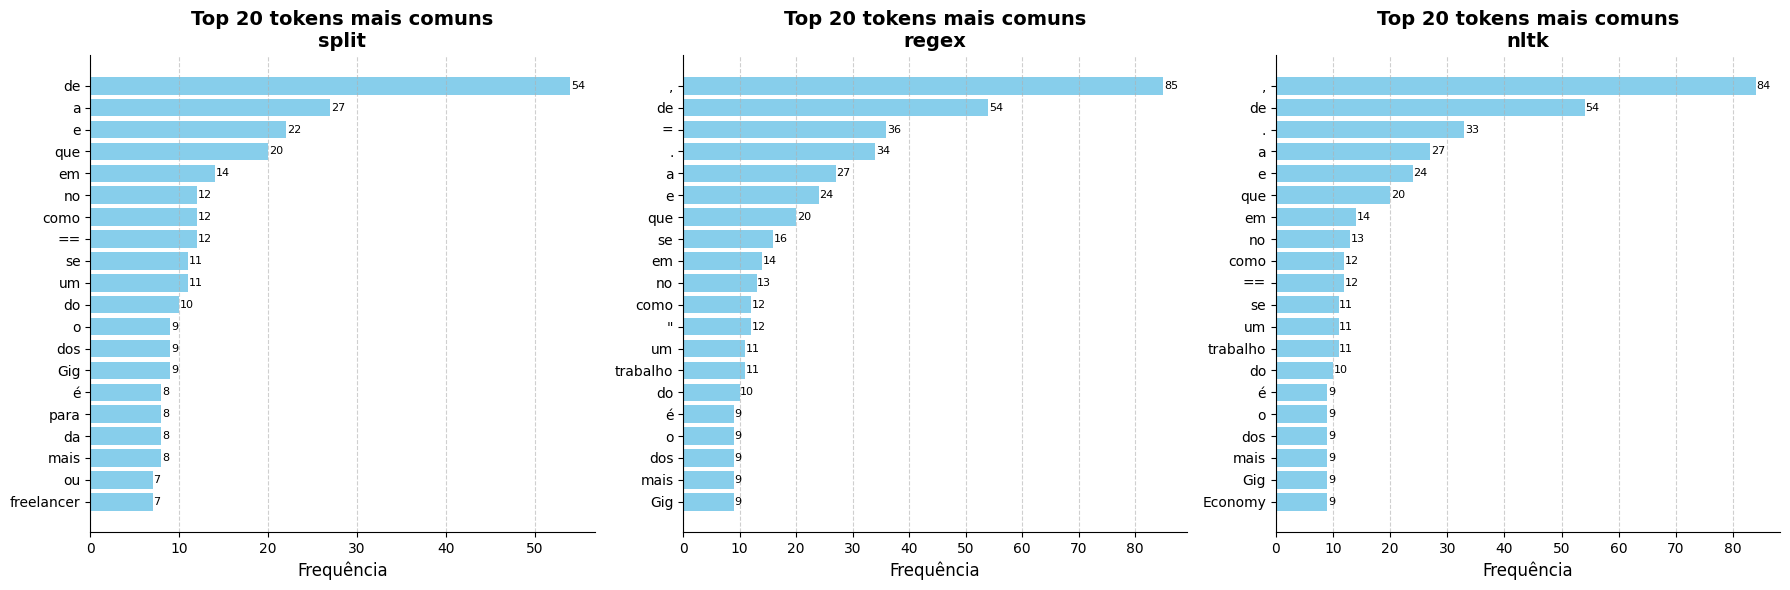

In [32]:
# Criando uma figura e três subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Ajuste o tamanho conforme necessário

# Plotando as frequências para cada lista de tokens em um subplot diferente
plot_frequencia_tokens(tokens_split, axs[0], f"Top 20 tokens mais comuns\nsplit")
plot_frequencia_tokens(tokens_regex, axs[1], f"Top 20 tokens mais comuns\nregex")
plot_frequencia_tokens(tokens_nltk, axs[2], f"Top 20 tokens mais comuns\nnltk")

plt.tight_layout()  # Ajusta automaticamente os parâmetros do subplot
plt.show()  # Mostra a figura com os três gráficos lado a lado

Como observado, há variações nas tokenizações realizadas, sendo a que utilizou expressões regulares (regex) a que gerou mais tokens. Portanto, vamos utilizar essa abordagem a partir de agora, com os resultados obtidos por **tokens_regex**.

## 2. Capitalização com **str.lower()**


In [33]:
# Utiliza uma compreensão de lista para converter cada token para minúsculo
tokens_regex_minusculos = [token.lower() for token in tokens_regex]

# Exibe os tokens convertidos
print(formata_msg("INFO", f"Tokens em minúsculos: \n{tokens_regex_minusculos}\n"))

[INFO] 2024-05-05 03:46:05 - Tokens em minúsculos: 
['freelancer', ',', 'também', 'conhecido', 'popularmente', 'no', 'brasil', 'pelas', 'expressões', 'ou', 'gírias', 'freela', 'ou', 'frila', ',', 'é', 'o', 'termo', 'inglês', 'para', 'denominar', 'o', 'profissional', 'autónomo', 'que', 'se', 'autoemprega', 'em', 'diferentes', 'empresas', 'ou', ',', 'ainda', ',', 'guia', 'seus', 'trabalhos', 'por', 'projetos', ',', 'captando', 'e', 'atendendo', 'seus', 'clientes', 'de', 'forma', 'independente', '.', 'é', 'uma', 'tendência', 'muito', 'em', 'alta', 'no', 'mercado', 'de', 'tradutores', ',', 'relações', 'públicas', ',', 'jornalismo', ',', 'design', ',', 'propaganda', ',', 'web', ',', 'tecnologia', 'da', 'informação', ',', 'música', 'e', 'muitos', 'outros', '.', 'a', 'expressão', ',', 'literalmente', 'traduzida', 'como', '"', 'lanceiro', 'livre', '"', ',', 'deriva', 'dos', 'cavaleiros', 'medievais', 'mercenários', ',', 'que', 'se', 'colocavam', 'a', 'serviço', 'dos', 'nobres', 'que', 'lhes', 

## 3. Remoção stopwords com a NLTK


In [34]:
# Carrega a lista de stopwords para o idioma especificado.
portugues_stops = stopwords.words('portuguese')

# Filtra os tokens, removendo aqueles que são stopwords.
tokens_sem_stop = [token for token in tokens_regex_minusculos if token not in portugues_stops]

# Exibe os tokens extraídos e a quantidade total
print(formata_msg("INFO", f"Tokens sem stopwords: \n{tokens_sem_stop}\n"))
print(formata_msg("INFO", f"Tamanho dos tokens sem stopwords: {len(tokens_sem_stop)}"))
print(formata_msg("INFO", f"Redução de tokens em relação à quantidade anterior em: {calcula_pct_reducao(len(tokens_regex_minusculos), len(tokens_sem_stop)):.2f}%"))

[INFO] 2024-05-05 03:46:05 - Tokens sem stopwords: 
['freelancer', ',', 'conhecido', 'popularmente', 'brasil', 'expressões', 'gírias', 'freela', 'frila', ',', 'termo', 'inglês', 'denominar', 'profissional', 'autónomo', 'autoemprega', 'diferentes', 'empresas', ',', 'ainda', ',', 'guia', 'trabalhos', 'projetos', ',', 'captando', 'atendendo', 'clientes', 'forma', 'independente', '.', 'tendência', 'alta', 'mercado', 'tradutores', ',', 'relações', 'públicas', ',', 'jornalismo', ',', 'design', ',', 'propaganda', ',', 'web', ',', 'tecnologia', 'informação', ',', 'música', 'muitos', 'outros', '.', 'expressão', ',', 'literalmente', 'traduzida', '"', 'lanceiro', 'livre', '"', ',', 'deriva', 'cavaleiros', 'medievais', 'mercenários', ',', 'colocavam', 'serviço', 'nobres', 'pagassem', 'guerrear', '.', 'apareceu', 'primeira', 'vez', 'livro', '"', 'ivanhoé', '"', ',', 'sir', 'walter', 'scott', ',', '1819', ',', 'trecho', ':', '"', 'i', 'offered', 'richard', 'the', 'service', 'of', 'my', 'free', 'lanc

## 4. Remoção números com regex

In [35]:
# Filtra os tokens, removendo aqueles que são números.
tokens_sem_numeros = [re.sub(r'\d+', '', palavra) for palavra in tokens_sem_stop if re.sub(r'\d+', '', palavra)]

# Exibe os tokens extraídos e a quantidade total
print(formata_msg("INFO", f"Tokens sem números: \n{tokens_sem_numeros}\n"))
print(formata_msg("INFO", f"Tamanho dos tokens sem números: {len(tokens_sem_numeros)}"))
print(formata_msg("INFO", f"Redução de tokens em relação à quantidade anterior em: {calcula_pct_reducao(len(tokens_sem_stop), len(tokens_sem_numeros)):.2f}%"))

[INFO] 2024-05-05 03:46:06 - Tokens sem números: 
['freelancer', ',', 'conhecido', 'popularmente', 'brasil', 'expressões', 'gírias', 'freela', 'frila', ',', 'termo', 'inglês', 'denominar', 'profissional', 'autónomo', 'autoemprega', 'diferentes', 'empresas', ',', 'ainda', ',', 'guia', 'trabalhos', 'projetos', ',', 'captando', 'atendendo', 'clientes', 'forma', 'independente', '.', 'tendência', 'alta', 'mercado', 'tradutores', ',', 'relações', 'públicas', ',', 'jornalismo', ',', 'design', ',', 'propaganda', ',', 'web', ',', 'tecnologia', 'informação', ',', 'música', 'muitos', 'outros', '.', 'expressão', ',', 'literalmente', 'traduzida', '"', 'lanceiro', 'livre', '"', ',', 'deriva', 'cavaleiros', 'medievais', 'mercenários', ',', 'colocavam', 'serviço', 'nobres', 'pagassem', 'guerrear', '.', 'apareceu', 'primeira', 'vez', 'livro', '"', 'ivanhoé', '"', ',', 'sir', 'walter', 'scott', ',', ',', 'trecho', ':', '"', 'i', 'offered', 'richard', 'the', 'service', 'of', 'my', 'free', 'lances', ',', 

## 5. Remoção pontuação com **string.punctuation**


In [36]:
# Filtra os tokens, removendo aqueles que são pontuações.
tokens_sem_pontuacao = [token for  token in tokens_sem_numeros if token not in string.punctuation]

print(formata_msg("INFO", f"Tokens sem pontuações: \n{tokens_sem_pontuacao}\n"))
print(formata_msg("INFO", f"Tamanho dos tokens sem pontuacoes: {len(tokens_sem_pontuacao)}"))
print(formata_msg("INFO", f"Redução de tokens em relação à quantidade anterior em: {calcula_pct_reducao(len(tokens_sem_numeros), len(tokens_sem_pontuacao)):.2f}%"))

[INFO] 2024-05-05 03:46:08 - Tokens sem pontuações: 
['freelancer', 'conhecido', 'popularmente', 'brasil', 'expressões', 'gírias', 'freela', 'frila', 'termo', 'inglês', 'denominar', 'profissional', 'autónomo', 'autoemprega', 'diferentes', 'empresas', 'ainda', 'guia', 'trabalhos', 'projetos', 'captando', 'atendendo', 'clientes', 'forma', 'independente', 'tendência', 'alta', 'mercado', 'tradutores', 'relações', 'públicas', 'jornalismo', 'design', 'propaganda', 'web', 'tecnologia', 'informação', 'música', 'muitos', 'outros', 'expressão', 'literalmente', 'traduzida', 'lanceiro', 'livre', 'deriva', 'cavaleiros', 'medievais', 'mercenários', 'colocavam', 'serviço', 'nobres', 'pagassem', 'guerrear', 'apareceu', 'primeira', 'vez', 'livro', 'ivanhoé', 'sir', 'walter', 'scott', 'trecho', 'i', 'offered', 'richard', 'the', 'service', 'of', 'my', 'free', 'lances', 'and', 'he', 'refused', 'them', '—', 'i', 'will', 'lead', 'them', 'to', 'hull', 'seize', 'on', 'shipping', 'and', 'embark', 'flanders', '

## 6. Remoção acentos com o **unidecode(str)**


In [37]:
tokens_sem_acentos = [unidecode(token) for token in tokens_sem_pontuacao]

print(formata_msg("INFO", f"Tokens sem acentos: \n{tokens_sem_acentos}\n"))
print(formata_msg("INFO", f"Tamanho dos tokens sem acentos: {len(tokens_sem_pontuacao)}"))
print(formata_msg("INFO", f"Redução de tokens em relação à quantidade anterior em: {calcula_pct_reducao(len(tokens_sem_pontuacao), len(tokens_sem_acentos)):.2f}%"))

[INFO] 2024-05-05 03:46:10 - Tokens sem acentos: 
['freelancer', 'conhecido', 'popularmente', 'brasil', 'expressoes', 'girias', 'freela', 'frila', 'termo', 'ingles', 'denominar', 'profissional', 'autonomo', 'autoemprega', 'diferentes', 'empresas', 'ainda', 'guia', 'trabalhos', 'projetos', 'captando', 'atendendo', 'clientes', 'forma', 'independente', 'tendencia', 'alta', 'mercado', 'tradutores', 'relacoes', 'publicas', 'jornalismo', 'design', 'propaganda', 'web', 'tecnologia', 'informacao', 'musica', 'muitos', 'outros', 'expressao', 'literalmente', 'traduzida', 'lanceiro', 'livre', 'deriva', 'cavaleiros', 'medievais', 'mercenarios', 'colocavam', 'servico', 'nobres', 'pagassem', 'guerrear', 'apareceu', 'primeira', 'vez', 'livro', 'ivanhoe', 'sir', 'walter', 'scott', 'trecho', 'i', 'offered', 'richard', 'the', 'service', 'of', 'my', 'free', 'lances', 'and', 'he', 'refused', 'them', '--', 'i', 'will', 'lead', 'them', 'to', 'hull', 'seize', 'on', 'shipping', 'and', 'embark', 'flanders', 'th

### 6.1. Gráfico de frequência dos tokens sem acentos.

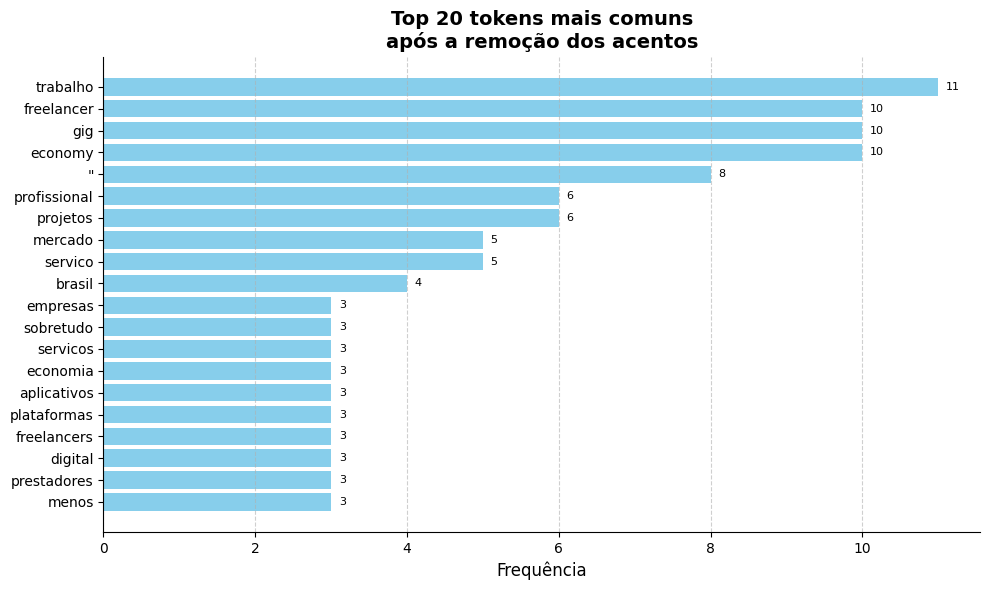

In [38]:
# Criando uma figura e três subplots
fig, axs = plt.subplots(1, 1, figsize=(10, 6))  # Ajuste o tamanho conforme necessário

# Plotando as frequências para cada lista de tokens em um subplot diferente
plot_frequencia_tokens(tokens_sem_acentos, axs, f"Top 20 tokens mais comuns\napós a remoção dos acentos")

plt.tight_layout()  # Ajusta automaticamente os parâmetros do subplot
plt.show()  # Mostra a figura com os três gráficos lado a lado

## 8. Stemming com a NLTK

In [39]:
# Inicialize o stemmer RSLPStemmer do NLTK
stemmed = nltk.stem.RSLPStemmer()

# Aplique o stemmer a cada token da lista, gerando uma nova lista de tokens 'stemmed'
tokens_stemmed = [stemmed.stem(token) for token in tokens_sem_acentos]

print(formata_msg("INFO", f"Tokens sem acentos: \n{tokens_stemmed}\n"))

[INFO] 2024-05-05 03:46:47 - Tokens sem acentos: 
['freelanc', 'conhec', 'popul', 'brasil', 'expresso', 'gir', 'freel', 'fril', 'term', 'ingl', 'denomin', 'profiss', 'auton', 'autoempreg', 'difer', 'empr', 'aind', 'gui', 'trabalh', 'projet', 'capt', 'atend', 'client', 'form', 'independ', 'tendenc', 'alt', 'merc', 'tradu', 'relaco', 'publ', 'jorn', 'design', 'propagand', 'web', 'tecnolog', 'informaca', 'music', 'muit', 'outr', 'expressa', 'liter', 'traduz', 'lanc', 'livr', 'deriv', 'caval', 'mediev', 'mercenari', 'coloc', 'serv', 'nobr', 'pag', 'guerr', 'aparec', 'prim', 'vez', 'livr', 'ivanho', 'sir', 'walt', 'scott', 'trech', 'i', 'offered', 'richard', 'the', 'serv', 'of', 'my', 'fre', 'lanc', 'and', 'he', 'refused', 'th', '--', 'i', 'will', 'lead', 'th', 'to', 'hull', 'seiz', 'on', 'shipping', 'and', 'embark', 'fland', 'thank', 'to', 'the', 'bustling', 'tim', 'man', 'of', 'action', 'will', 'alway', 'find', 'employment', 'grand', 'dificuldad', 'profiss', 'assum', 'freelanc', 'sobretud

### 8.1. Plote a frequência dos tokens após o processo de stemming.

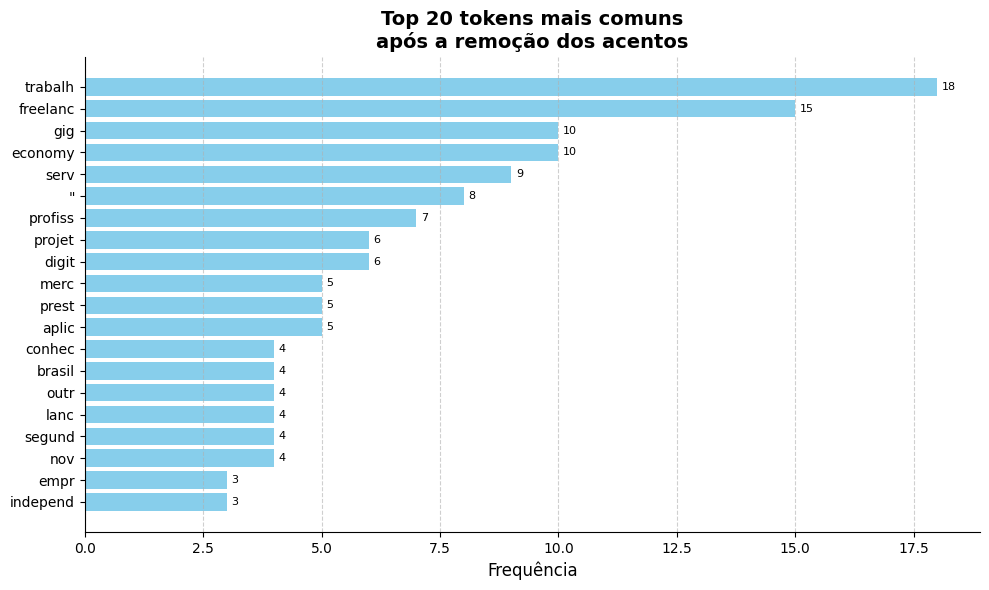

In [40]:
# Criando uma figura e três subplots
fig, axs = plt.subplots(1, 1, figsize=(10, 6))  # Ajuste o tamanho conforme necessário

# Plotando as frequências para cada lista de tokens em um subplot diferente
plot_frequencia_tokens(tokens_stemmed, axs, f"Top 20 tokens mais comuns\napós a remoção dos acentos")

plt.tight_layout()  # Ajusta automaticamente os parâmetros do subplot
plt.show()  # Mostra a figura com os três gráficos lado a lado

## 9. Lemmatization com o Spacy


In [41]:
nlp = spacy.load("pt_core_news_sm")

# Junte os tokens em uma única string, separada por espaços.
str_tokens = ' '.join(tokens_sem_pontuacao)

# Processa a string de tokens com o modelo de linguagem natural.
doc = nlp(str_tokens)

# Gera os lemas dos tokens processados.
tokens_lemm = [token.lemma_ for token in doc]


print(formata_msg("INFO", f"Tokens lematizados: \n{tokens_lemm}\n"))

[INFO] 2024-05-05 03:46:57 - Tokens lematizados: 
['freelancer', 'conhecer', 'popularmente', 'Brasil', 'expressão', 'gíria', 'freela', 'frila', 'termo', 'inglês', 'denominar', 'profissional', 'autónomo', 'autoempregar', 'diferentes', 'empresa', 'ainda', 'guiar', 'trabalho', 'projeto', 'captar', 'atender', 'cliente', 'forma', 'independente', 'tendência', 'alto', 'mercar', 'tradutor', 'relação', 'público', 'jornalismo', 'design', 'Propaganda', 'Web', 'tecnologia', 'informação', 'músicar', 'muito', 'outro', 'expressão', 'literalmente', 'traduzido', 'lanceiro', 'livre', 'deriva', 'cavaleiro', 'medieval', 'mercenário', 'colocar', 'serviço', 'nobr', 'pagassem', 'guerrear', 'aparecer', 'primeira', 'vez', 'livro', 'ivanhoé', 'sir', 'walter', 'scott', 'trecho', 'i', 'offered', 'richard', 'The', 'Service', 'of', 'my', 'Free', 'lance', 'and', 'he', 'refused', 'ther', '—', 'i', 'will', 'lead', 'ther', 'to', 'hull', 'seizar', 'on', 'Shipping', 'and', 'embark', 'flander', 'thank', 'to', 'the', 'bust

### 9.1. Plote a frequência dos tokens após o processo de stemming..

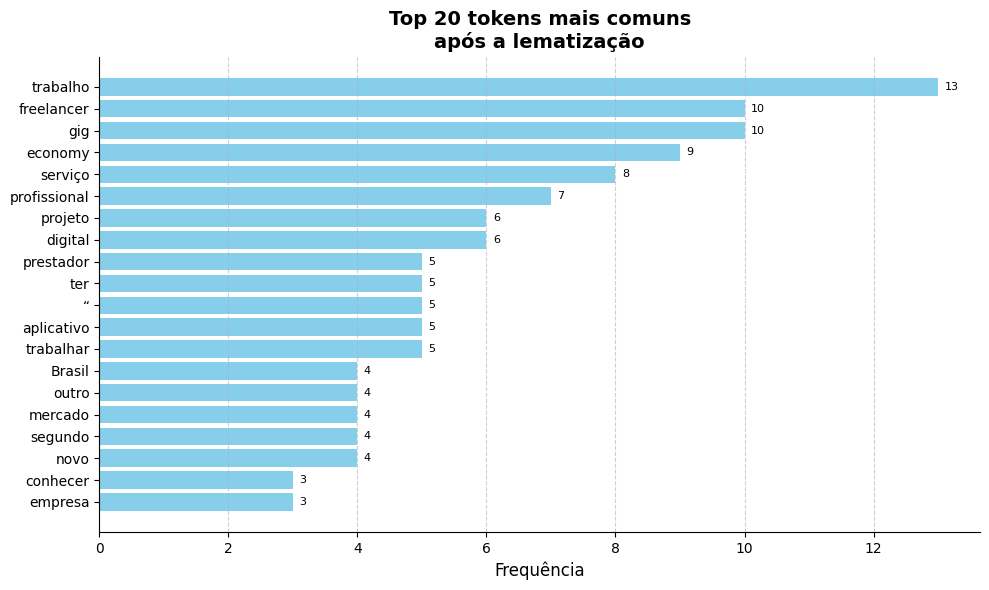

In [42]:
# Criando uma figura e três subplots
fig, axs = plt.subplots(1, 1, figsize=(10, 6))  # Ajuste o tamanho conforme necessário

# Plotando as frequências para cada lista de tokens em um subplot diferente
plot_frequencia_tokens(tokens_lemm, axs, f"Top 20 tokens mais comuns\napós a lematização")

plt.tight_layout()  # Ajusta automaticamente os parâmetros do subplot
plt.show()  # Mostra a figura com os três gráficos lado a lado